## Model comparison using traceability analysis
We use the infrastructure built so far to compare two ore more models.
The workhorse will be an iterator (returned by a general function). That allows us to compute and easily access the desired timelines with python index notation it[2:5] will return the values from position 2 to 5 of the solution (and desired variables).
The notebook also contains some functions to compute where the times of two models overlap and some plot functions.
## Outline
### 0.) Infrastructure for comparison plots (for self perusal)
- common times
- iterator notation
- example plots
- temporal averages

### 1.) We will investigate the role of $\mathbf{X_c}$
- $\mathbf{X_c}$ myth busting by counter examples
- provable statements about $\mathbf{X_c}$
    - scalar attraction in the surrogate system
    - vector attraction for steady state forcasts   

### 2.) Towards attribution of uncertaincies to temperature  and moisture 
- elementary sensitivity analysis using partial derivatives
- $\xi$ience or pitfalls in interpreting $\xi$  
- derive $\frac{\partial}{\partial Temp}$ or $\frac{\partial}{\partial Moist}$ automatically from the symbolic description.


### 3.) Next steps
- apply the notebook to compare your model with others.
- new tests to help you pin down possible problems with your model
- mid-term ownership of the framework teaching and tickets (make Markus disposable ;-))


In [1]:
from IPython.display import Markdown, display
display(Markdown("TracebilityText.md"))

---
jupyter:
  jupytext:
    text_representation:
      extension: .md
      format_name: markdown
      format_version: '1.3'
      jupytext_version: 1.13.6
  kernelspec:
    display_name: Python 3 (ipykernel)
    language: python
    name: python3
---

<!-- #region -->
### Traceability analysis  

#### Outline
The traceability analysis defines several diagnostic variables using as much algebraic structure of the mass balance equation as is available.
Not all diagnostic variables are possible for all compartmental models. 

We chose here to introduce the diagnostic variables not all at once but rather in the order of decreasing generality.

The first diagnostic variables are available for all compartmental models and need no additional assumptions. 
In the later parts of this section we then assume to be able to identify more and more specific terms in the mass balance equation and use those to derive and trace ever more specific diagnostics.
Thus the very first part is valid for all models but how many of the later parts are applicable to a specific model  depends on how much we know about it.  


#### Derivation of the matrix decomposition 
Compartmental models (well mixed mass balanced) can be written in as an ordinary differential equation in matrix form that relates the momentary value of the (time) derivative $\frac{d X}{d t}$ of an yet unknown function $X$ to the momentary value of $X$ itself.   
$$
\frac{d X}{d t}= I(X,t) + \tilde{M}(X,t) X \quad (1)   
$$ 
where $X$ is the statevector representing the pool contents, $\tilde{M}$ the "Compartmental matrix" and $I$ the input vector.
In Yiqi's group equation (1) is usually written with the negative Compartmental Matrix $M=-\tilde{M}$ 

$$
\frac{d X}{d t}= I(X,t) - M(X,t) X \quad (2)   
$$ 

Together with a startvalue $X_0$ it constitutes an "initial value problem" (ivp) which can be solved numerically by moving step by step forward in time.

Note: 

It is mathematical standard notation to use $X$ in the *formulation* of the ivp (representing the momentary value) althoug *after we have solved it* the solution is expressed as function of time $X(t)$. This avoids confusion since everything appering with arguments is recognizable as explicitly calculable *before* we have solved the ivp.

The system is "nonautonomous" (if they depend on time $t$) and "nonlinear" if the dependent on $X$.
It is always possible to factorize $M(X,t)$ into a product $M=A(X,t) K(X,t)$ where $K$ is a  diagonal matrix.
and $I=B(t)*u(t)$ where $u$ is a scalar.
Using these we arrive at 
$$
\frac{d X}{d t}=B(X,t) u(X,t) - A(X,t) K(X,t) X   
$$

##### Linearity assumption
If we assume the model to be linear and nonautonomous the dependency on $X$ vanishes and we have

$$
\frac{d X}{d t}= A(t) K(t) X + B(t) u(t) . 
$$

##### Factorizability  assumption
Although this is not possible in general in many published models the nonautonous part  can be further localized into a diagonal matrix $\xi(t)$ so that we can achieve constant $A$ and $K$ which allows more specific interpretation.

$$
\frac{d X}{d t}= B(t)u(t) - A \xi(t) K X 
$$

##### Factorizability of $\xi$ assumption 
In some cases we can resolve $\xi$ further.
$$
\frac{d X}{d t}= B(t)u(t) - A \xi_{temp}(t) \xi_{mois}(t) K X  
$$

#### Definition of diagnostic variables

##### Storage capacity $X_c$ and storage potential $X_p$
These variables can be defined for any compartmental system and do not require either linearity nor factorizability. 
We can rearrange eq. $(1)$ and give names to the two summands. 
$$
X = M^{-1}(X,t) \left(I(X,t)- \frac{d X}{d t} \right) \\ 
  = \underbrace{M^{-1}(X,t)I(X,t)}_{X_c} - \underbrace{M^{-1}(X,t) \frac{d X}{d t} }_{X_p} \\
  = X_c - X_p
$$
Note:
This is not to be read as a recipe to compute $X$.
The equation becomes a bit clearer if we adapt the nomenclature to express that we *have solved the ivp* and know its solution $X(t)$  
and therefore also  the derivative $\frac{d X}{d t}=I(X(t),t) - M(X(t),t) X(t) =\dot{X}(t)$ 
By substituting the solution $X(t)$ we get the recipes to compute:
$$
\dot{X}(t) = I(X(t),t) - M(X(t),t) X \\
X_c(t) = X(t)-X_p(t) \\ 
X_p(t) = M^{-1}(X(t),t)I(X,t) \\ 
$$
we see that all the ingredients become explicit functions of time.   
Since all values are taken at the same time $t$ we can drop the time dependence
in the notation and write an equation we can use in the iterator.
$$
\dot{X} = I - M X \\
X_c = X + X_p \\ 
X_p = M^{-1}I  \\ 
$$

##### Residence time
The influx $I$ can always be written as $I=b u$ where the scalar $u=\sum_{k=1\dots n} I_k$  and the dimensionless vector $b=I/u$ where $\sum_{k=1\dots n} b_k =1$.
Assumimg that the pool contents (the components of $X$)  have dimension $mass$ we can infer from eq. (1) that $M$ has dimension $\frac{1}{time}$.
The components of the (inverse) matrix $M^{-1}$ have therefore dimension $time$. Accordingly the product $RT= M^{-1} b$ is a vector of the same shape as $X$  whose components have dimesion $time$.
In the context of the Traceability Framework $RT$ is therefore called *residence time*.

Notes on nomenclature: 
1. The term *residence time* is not universally used with the same connotation outside the context of the *Traceability Analysis*.

1. It is not *the time of residence* of the particles in the system for the following reasons:
    1. In well mixed systems particles can reside in a pool for different times from zero to infinity.
    1. You could compute the mean of these times over all particles exiting a pool, but even then the result is in general not equal to the above mentioned $rt$.
    1. The mean residence time would only coincide with the definition above if the system was in equilibrium (which it clearly is not as e.g $NPP(t)$ shows.)
    1. The origin of the term is probably most easily understood as the generalization of a one dimensional rate equation $\frac{d}{dt} x = m x + u$ 
       If $r$ and $u$ are constant then the mean residence time is $rt= m^{-1}$. If we start with the rate as property of the model the *residence time* 
       can be defined as the inverse of this rate. The above definition is the generalization of this simple relationship to matrices and vectors.
       The matrix $M^{-1}$ takes the role of the number $\frac{1}{m}$ . In the context of the *Traceability Analysis* $M^{-1}$ is called *Chasing Time*. 

<!-- #endregion -->

```python

```


In [2]:
%load_ext autoreload
%autoreload 2
import json
import matplotlib.pyplot as plt
from typing import Tuple
from importlib import import_module
from pathlib import Path
from frozendict import frozendict
import numpy as np
from functools import lru_cache
import bgc_md2.display_helpers as dh
import bgc_md2.helper as h
from bgc_md2.resolve.mvars import (
    CompartmentalMatrix,
    InputTuple,
    StateVariableTuple
)
import general_helpers as gh


# define some shortcut functions that yield the result depending on the 
# model folder  mf
def sim_day_2_day_aD_func(mf): #->function
    return gh.msh(mf).make_sim_day_2_day_since_a_D(gh.confDict(mf))

def tracebility_iterator(mf,delta_t_val):
    ta=gh.test_args(mf)
    mvs_t=gh.mvs(mf)
    dvs_t=ta.dvs
    cpa_t=ta.cpa
    epa_t=ta.epa_opt
    X_0=gh.msh(mf).numeric_X_0(mvs_t,dvs_t,cpa_t,epa_t)
    func_dict=gh.msh(mf).make_func_dict(mvs_t,dvs_t,cpa_t,epa_t)
    
    return gh.traceability_iterator(
        X_0,
        func_dict,
        mvs=mvs_t,
        dvs=dvs_t,
        cpa=cpa_t,
        epa=epa_t,
        delta_t_val=delta_t_val
    )
    
model_folders=['yz_jules','kv_visit2']#, 'Aneesh_SDGVM']#, 'kv_ft_dlem', 'jon_yib']#,'Aneesh_SDGVM','cable-pop','yz_jules']#,]
mf=model_folders[0]
cd={
        'X':"red",
        'X_c':"orange",
        'X_p':"blue",
        'X_dot':"red",
        'x':"red",
        'x_c':"orange",
        'x_p':"blue",
        'x_dot':"red",
        'I':"green",
        'u':"green",
}

In [3]:
def times_in_days_aD(mf,delta_t_val):
    n_months=len(gh.test_args(mf).dvs[0])
    n_days=n_months*30
    n_iter=int(n_days/delta_t_val)
    days_after_sim_start=delta_t_val*np.arange(n_iter)
    return np.array(tuple(map(sim_day_2_day_aD_func(mf),days_after_sim_start)))

delta_t_val=30 # assuming the same step size for every model (could be made model specific by an additional testarg)

In [4]:
def t_min_tmax(model_folders,delta_t_val):
    td={
        mf: times_in_days_aD(mf,delta_t_val)
        for mf in model_folders
    }
    t_min = max([t.min() for t in td.values()])
    t_max = min([t.max() for t in td.values()])
    return (t_min,t_max)

t_min_tmax(model_folders,delta_t_val)

reading  tsl , size is  (3840, 4, 144, 192)
{InputTuple,CompartmentalMatrix}
{CompartmentalMatrix,InternalFluxesBySymbol,InputTuple,OutFluxesBySymbol,SmoothReservoirModel,InFluxesBySymbol}
{CompartmentalMatrix,InternalFluxesBySymbol,InputTuple,OutFluxesBySymbol,SmoothReservoirModel,InFluxesBySymbol}
 Found cached global mean files. If you want to recompute the global means
            remove the following files: 
/home/data/VISIT/test/VISIT_S2_cVeg_gm.nc
/home/data/VISIT/test/VISIT_S2_cLitter_gm.nc
/home/data/VISIT/test/VISIT_S2_cSoil_gm.nc
/home/data/VISIT/test/VISIT_S2_rh_gm.nc
/home/data/VISIT/test/VISIT_S2_gpp_gm.nc
/home/data/VISIT/test/VISIT_S2_ra_gm.nc
/home/data/VISIT/test/VISIT_S2_mrso_gm.nc
/home/data/VISIT/test/VISIT_S2_tas_gm.nc


(679000, 735808)

In [5]:
#find the timesteps corresponding to shared times
from functools import reduce
def min_max_index(mf,delta_t_val,t_min,t_max):
    ts=times_in_days_aD(mf,delta_t_val)
    def count(acc,i):
        min_i,max_i = acc
        t=ts[i]
        min_i = min_i+1 if t < t_min else min_i 
        max_i = max_i+1 if t < t_max else max_i 
        return (min_i,max_i)
    
    return reduce(count,range(len(ts)),(0,0)) 

s=slice(*min_max_index("yz_jules",delta_t_val,*t_min_tmax(model_folders,delta_t_val)))
s.step is None 

#ind_d={mf: min_max_index(mf) for mf in model_folders}

True

In [6]:
# You can use python index notation on the iterator
# it works the same way as  with a list
l=[1,2,3,4,5,6,7,8,9]
l[3:8:2]

[4, 6, 8]

In [7]:
itr=tracebility_iterator(mf,delta_t_val)
res=itr[3:8:2]
# take a peek
#type(res), res._fields, res.X_c.shape, res.X_dot

In [8]:
#mf='kv_visit2'
mf="yz_jules"
start,stop=min_max_index(mf,delta_t_val,*t_min_tmax(model_folders,delta_t_val))
start,stop

(1946, 3839)

In [9]:
times=times_in_days_aD(mf,delta_t_val)[start:stop]/365
vals=itr[start:stop]
vals.X_c.shape,times.shape 
#vals

((1893, 7, 1), (1893,))

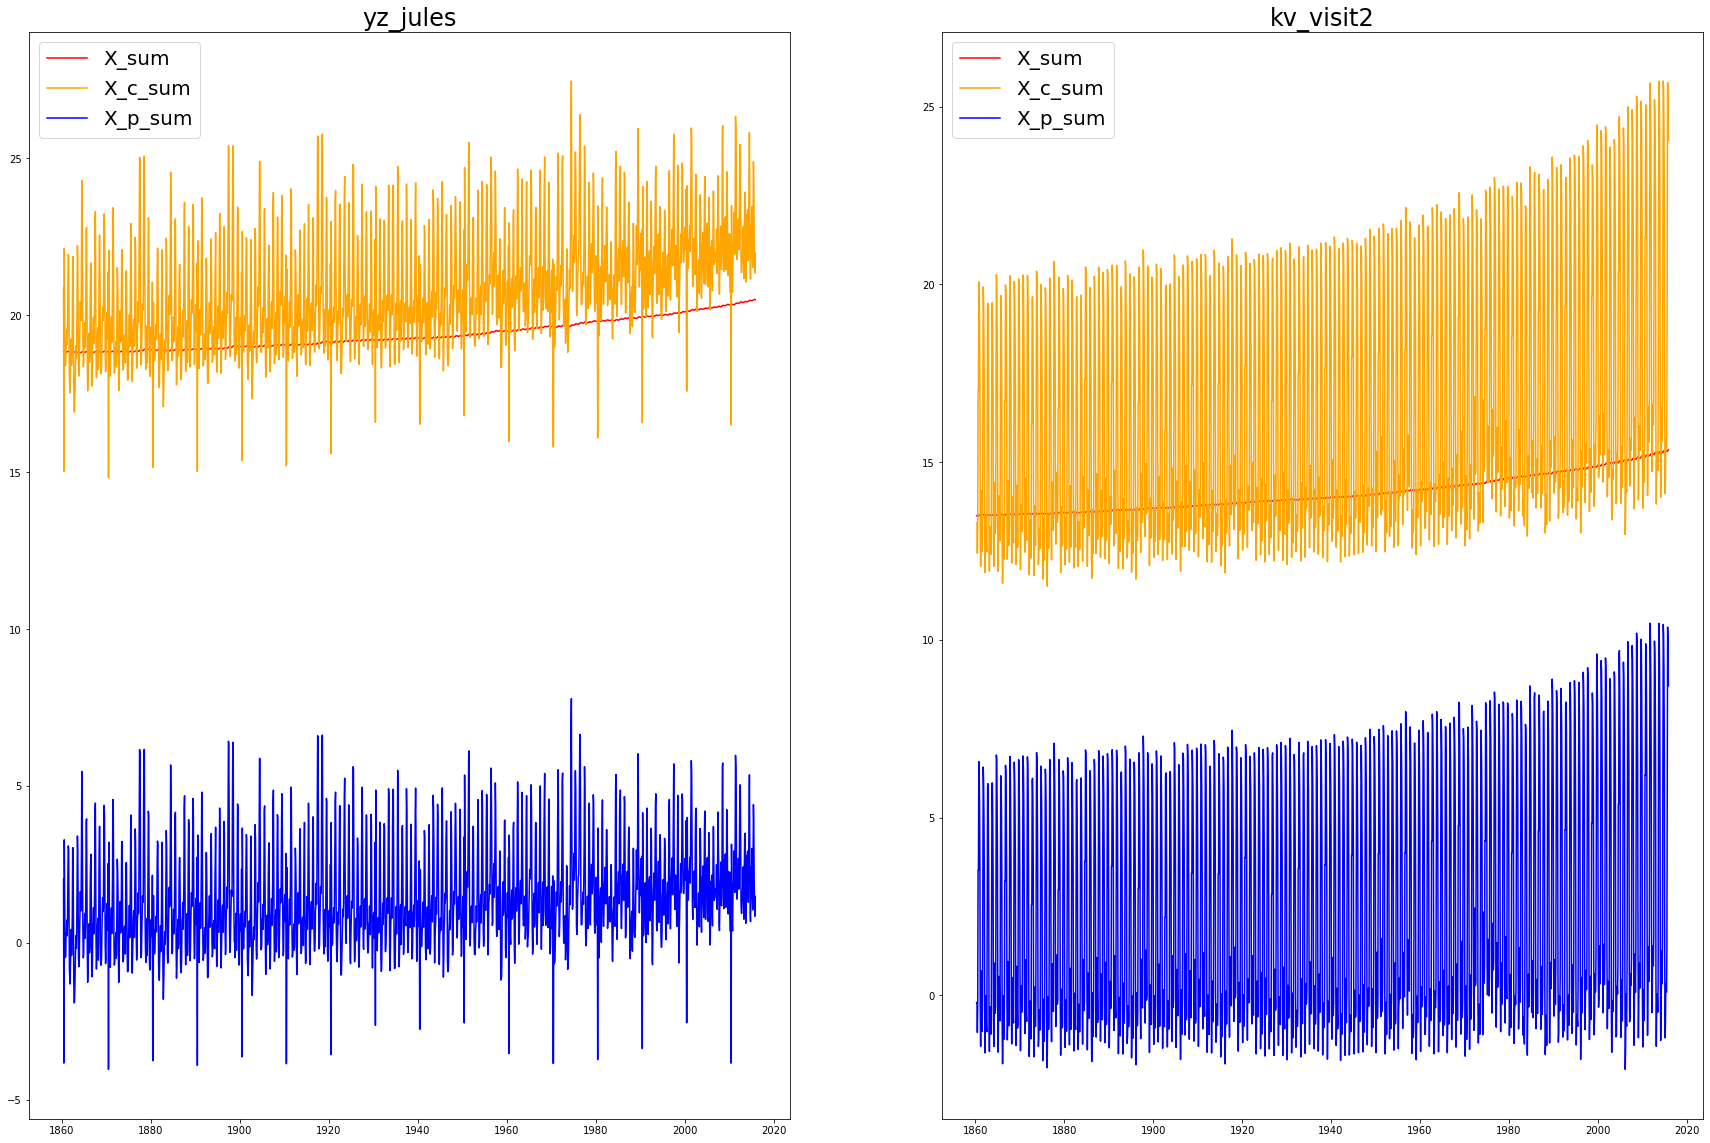

In [10]:
import matplotlib.pyplot as plt
def plot_sums(model_folders,delta_t_val,cd):
    n = len(model_folders)
    fig=plt.figure(figsize=((n+1)*10,20))
    axs=fig.subplots(1,n)
    plt.rcParams['font.size'] = 20
    names=['X','X_c','X_p']
    for i,mf in enumerate(model_folders):
        itr=tracebility_iterator(mf,delta_t_val)
        start,stop=min_max_index(mf,delta_t_val,*t_min_tmax(model_folders,delta_t_val))
        #tups=values(itr,start,stop)
        #vals=values_2_TraceTuple(tups)
        vals=itr[start:stop]
        times=times_in_days_aD(mf,delta_t_val)[start:stop]/365
        ax=axs[i]
        for name in names:
            ax.plot(
                times,
                vals.__getattribute__(name).sum(axis=1),
                label=name+"_sum",
                color=cd[name]
            )
        ax.legend()
        ax.set_title(mf)
    #plt.close(fig)
    
plot_sums(model_folders,delta_t_val, cd)

## temporal averages
In some cases you might want to see a yearly or monthly average.
You could compute all the values and then compute the averages of parts of the arrays.
The iterator can also do it for you (without storing the unnecessary potentially huge intermediate fine grained arrays). The argument for the averaging will be a list of (start,stop) tuples describing the ranges over which to average. 

In [11]:
# we can build this partition by a little function 
def partitions(start,stop,nr_acc=1):
    diff=stop-start
    step=nr_acc
    number_of_steps=int(diff/step)
    last_start=start+number_of_steps*step
    last_tup=(last_start,stop)
    return [
        (
            start + step * i,
            start + step *(i+1)
        )
        for i in range(number_of_steps)
    ]+[last_tup]

# an example we want to partition 
#partitions(0,10,nr_acc=3)
#partitions(start,stop,12)

In [12]:
itr=tracebility_iterator(mf,delta_t_val)
start,stop=min_max_index(mf,delta_t_val,*t_min_tmax(model_folders,delta_t_val))
tavg_vals=itr.averaged_values(
    partitions(start,stop,12)
)

In [13]:
tavg_vals.X.shape

(158, 7, 1)

In [14]:
def averaged_times(times,partitions):
    return np.array(
        [
            times[p[0]:p[1]].sum()/(p[1]-p[0]) for p in partitions
        ]
    )
    
averaged_times(
    times_in_days_aD(mf,delta_t_val),
    partitions(start,stop,12)
).shape

(158,)

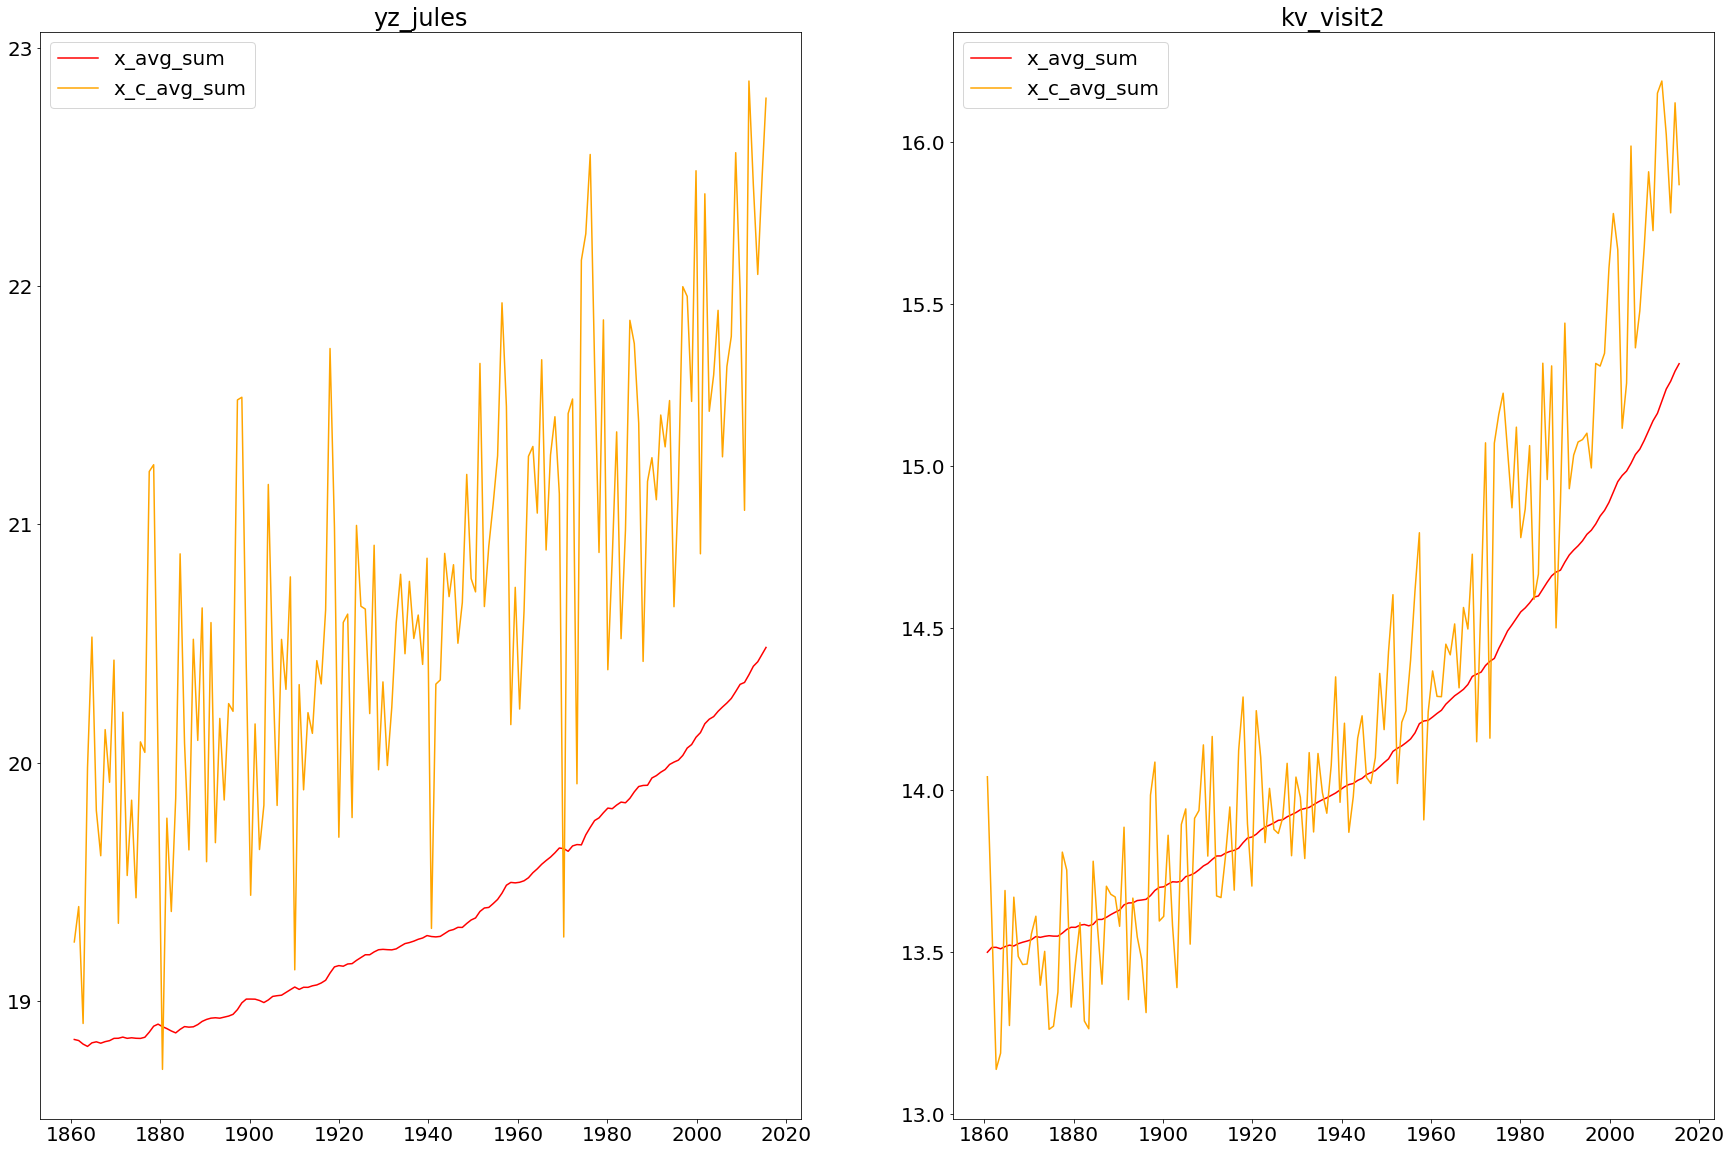

In [15]:
def plot_yearly_avg_sums(model_folders,delta_t_val,cd):
    n = len(model_folders)
    fig=plt.figure(figsize=((n+1)*10,20))#, dpi = 400)
    axs=fig.subplots(1,n)
    plt.rcParams['font.size'] = 20
    #names=['X','X_c']#,'X_p']
    names=['x','x_c']#,'x_p']
    for i,mf in enumerate(model_folders):
        itr=tracebility_iterator(mf,delta_t_val)
        start,stop=min_max_index(mf,delta_t_val,*t_min_tmax(model_folders,delta_t_val))
        parts=partitions(start,stop,12)
        times=averaged_times(
            times_in_days_aD(mf,delta_t_val)/365,
            parts
        )
        vals=itr.averaged_values(
            parts
        )
        ax=axs[i]
        for name in names:
            ax.plot(
                times,
                vals.__getattribute__(name),
                label=name+"_avg_sum",
                color=cd[name]
            )
        ax.legend()
        ax.set_title(mf)
        
plot_yearly_avg_sums(model_folders, delta_t_val, cd)

## Application: Numerical experiment concerning the  attraction of the solution to wards $X_c$.
In  Yiqis 2017 Biogeosciences paper: "Transient dynamics of terrestrial carbon storage: mathematical foundation and its applications" the carbon storage potential $\mathbf{X_c}(t)$  is called an "attractor" for the solution $\mathbf{X}(t)$ "at ecosystem scale".
We will try to visualize this for our models.
Before we can prove or e anything we have to specify what we mean concretely.
We will plot several candidates and see what happens: 
### 1. The components of $(\mathbf{X_c})_p \; p \in pools $ with the components of the stocks     
$(\mathbf{X})_p \; p \in pools$ and the components of the derivative  $(\dot{\mathbf{X}})_p \; p \in pools$
### 2.) The  sums of the components e.g. $\sum_{p \in pools}(\mathbf{X_c})_p$ is chased by  $\sum_{p \in pools}(\mathbf{X})_p$
### Results:
1.) regarding $\mathbf{X_c}$ as a vector and plotting the components

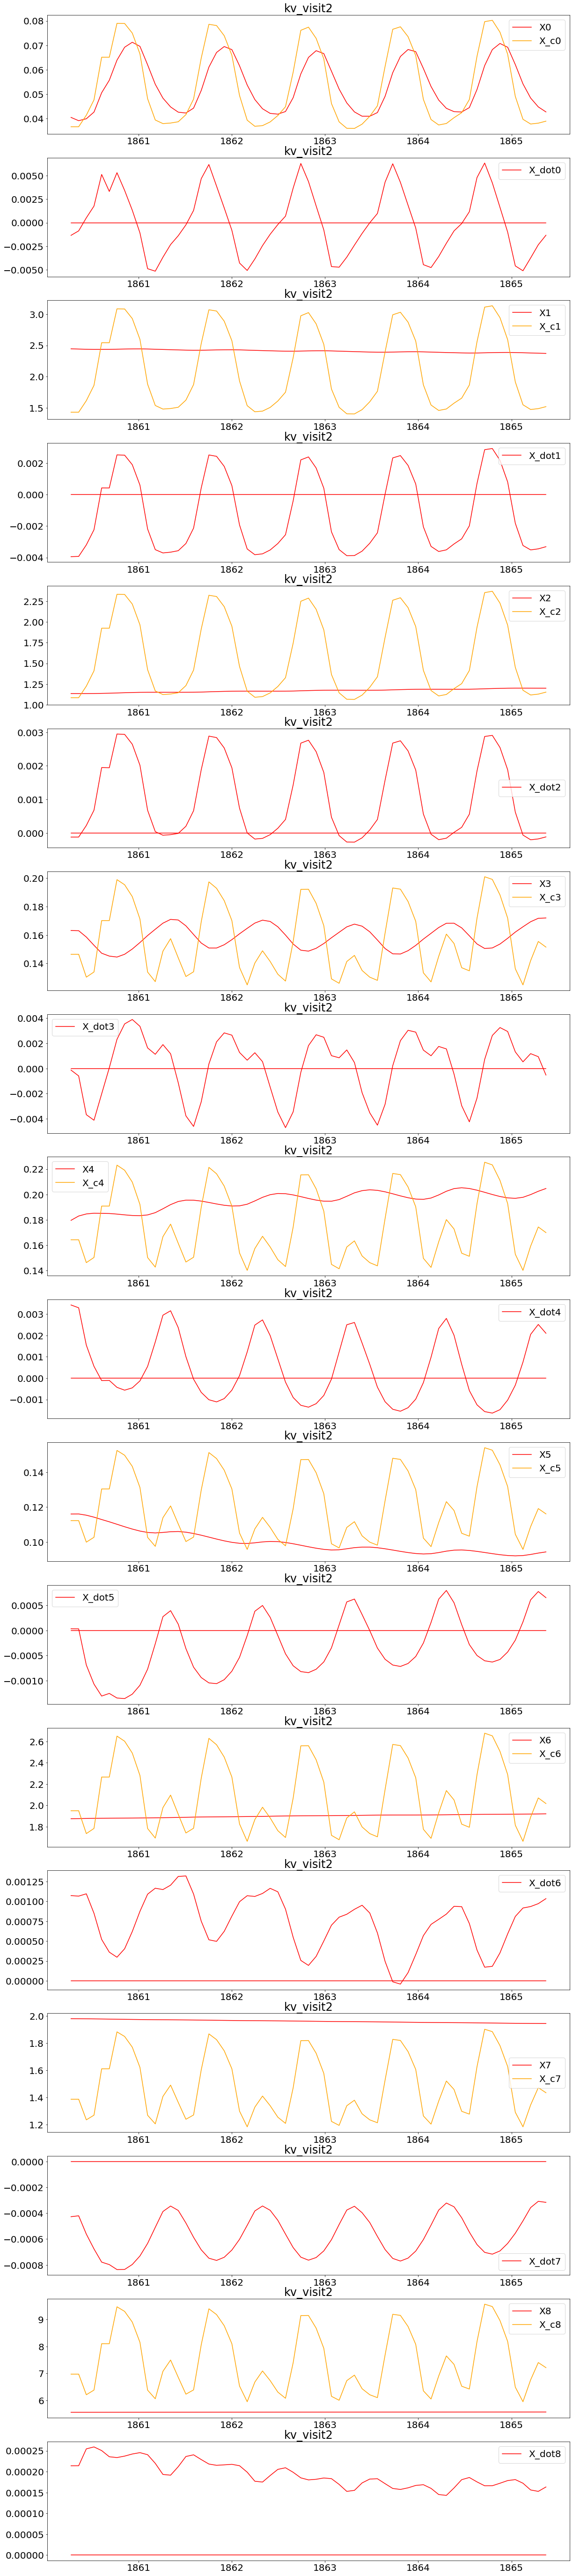

In [16]:
def plot_components(mf,delta_t_val,cd):
    names_1=['X','X_c']#,'X_p']
    names_2=['X_dot']
    itr=tracebility_iterator(mf,delta_t_val)
    start_min,stop_max=min_max_index(mf,delta_t_val,*t_min_tmax(model_folders,delta_t_val))
    # we do not want the whole interval but look at a smaller part to observe the dynamics
    start,stop = start_min, int(start_min+(stop_max-start_min)/30)
    vals=itr[start:stop]
    n = vals.X.shape[1]
    fig=plt.figure(figsize=(20,(n+1)*10))#, dpi = 400)
    axs=fig.subplots(2*n,1)
    plt.rcParams['font.size'] = 20
    times=times_in_days_aD(mf,delta_t_val)[start:stop]/365
    i=0
    for j in range(n):
        ax=axs[2*j]#,i]
        for name in names_1:
            time_line= vals.__getattribute__(name)
            ax.plot(
                times,
                time_line[:,j,0],
                label=name+str(j),
                color=cd[name]
            )
            ax.legend()
            ax.set_title(mf)
        
        ax=axs[2*j+1]#,i]
        for name in names_2:
            time_line= vals.__getattribute__(name)
            ax.plot(
                times,
                time_line[:,j,0],
                label=name+str(j),
                color=cd[name]
            )
            ax.plot(
                times,
                np.zeros_like(times),
                color=cd[name]
            )
            ax.legend()
            ax.set_title(mf)
    
#plot_components(model_folders[0],delta_t_val)
plot_components(model_folders[1],delta_t_val,cd)

### Conclusion w.r.t. 1.) :
Looking at component $X_6$ we observe that component 6 of the derivative vector $\dot{\mathbf{X}}_6$ does change sign only once in the plotted interval whereas the graphs of $\mathbf{X}_6$ and $\mathbf{X_c}_6$ cross each other several times. 

That means  $\dot{\mathbf{X}}_6$ clearly does not move in the direction of $\mathbf{X_c}_6$ and therefore in general $\dot{\mathbf{X}}$ as a vector does not move in the direction of 
$\mathbf{X_c}$. 
In the later part of section 3.2 it becomes clear that this is not claimed for all the pools.
So calling the whole $\bf vector$ $\mathbf{X_c}$ an attractor for the vector $\mathbf{X}$ in the local sense that the derivative $\dot{\mathbf{X}}$ is always pointing towards $\mathbf{X_c}$ is misleading.

Our next idea to show that this holds  "on ecosystem level"

### 2.) Is the sum of the components e.g. $\sum_{p \in pools}(\mathbf X)_p $ chasing the sum of the components of  $ \sum_{p \in pools}(\mathbf{X_c})_p$ ?

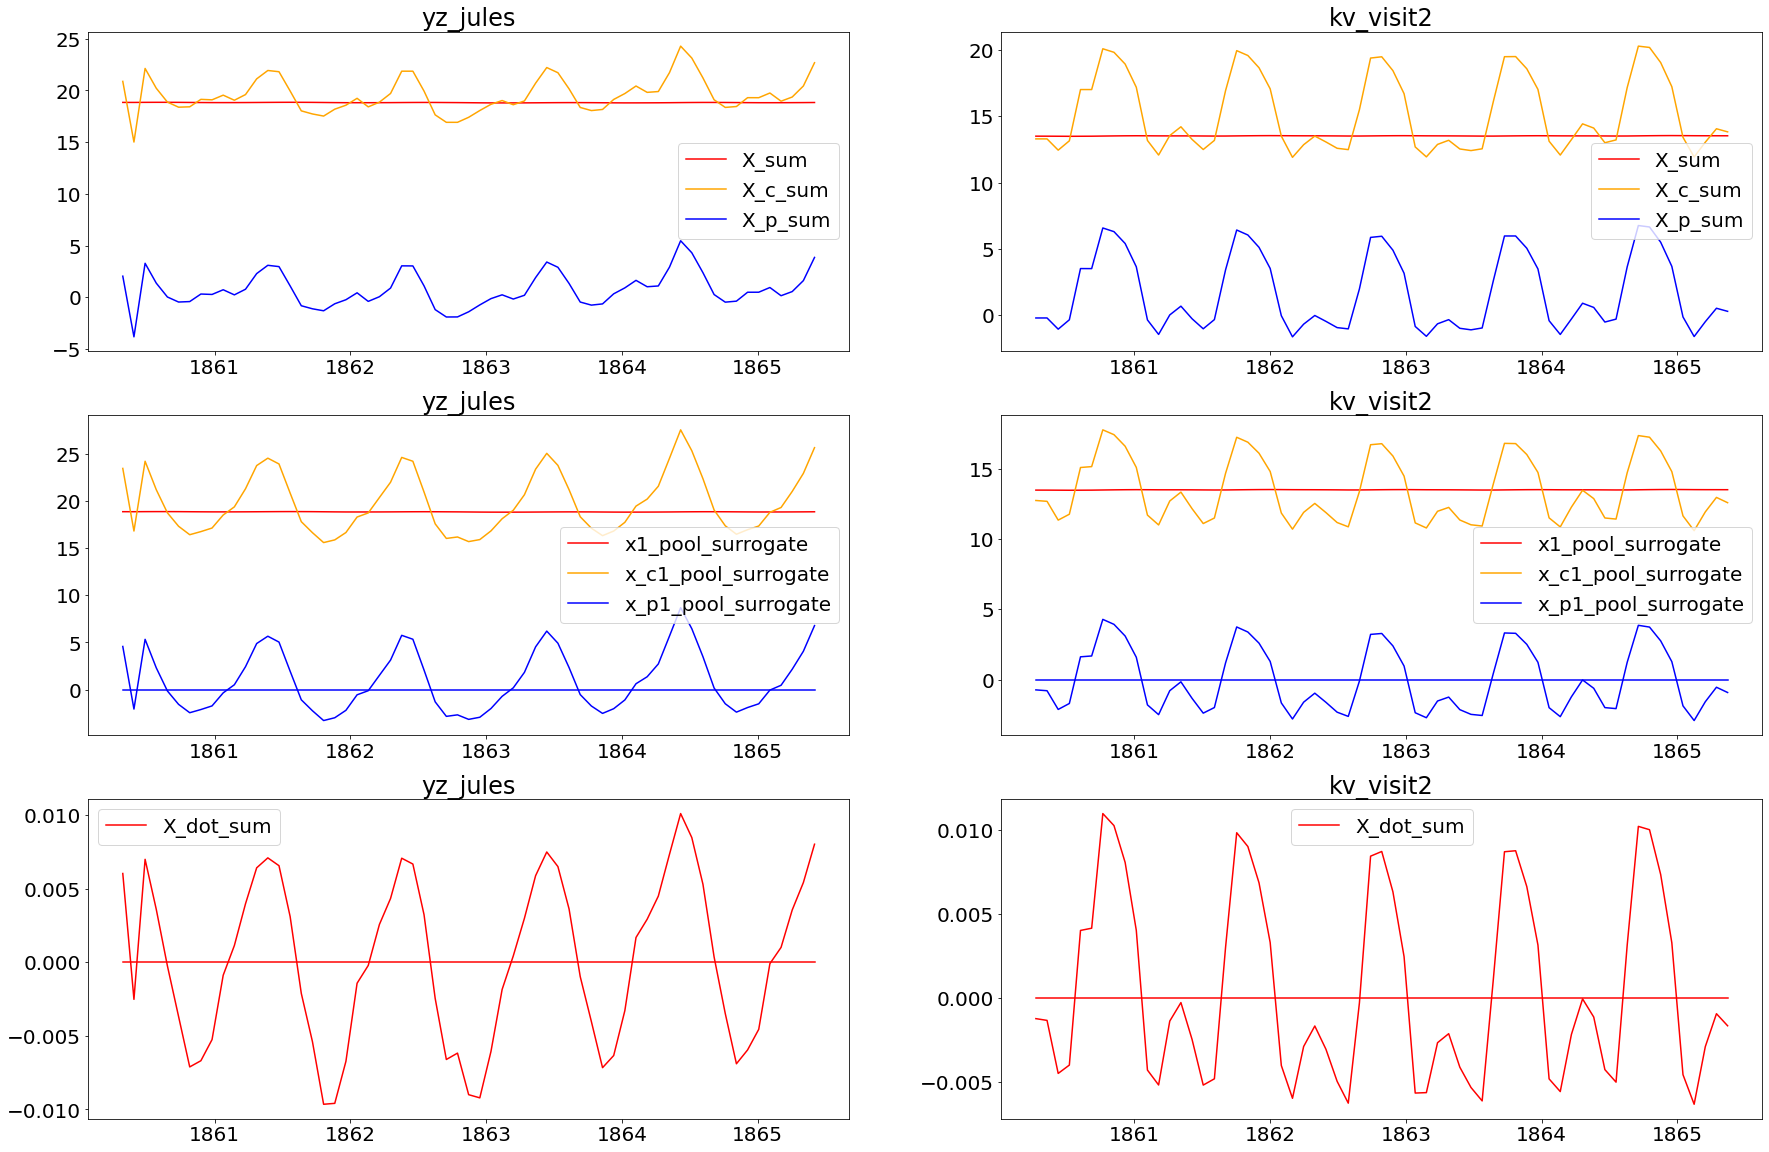

In [17]:
def plot_sums(model_folders,delta_t_val,cd):
    n = len(model_folders)
    fig=plt.figure(figsize=((n+1)*10,20))#, dpi = 400)
    axs=fig.subplots(3,n)
    plt.rcParams['font.size'] = 20
    names_0=['X','X_c','X_p']
    names_1=['x','x_c','x_p']
    names_2=['X_dot']
    for i,mf in enumerate(model_folders):
        itr=tracebility_iterator(mf,delta_t_val)
        start_min,stop_max=min_max_index(mf,delta_t_val,*t_min_tmax(model_folders,delta_t_val))
        # we do not want the whole interval but look at a smaller part to observe the dynamics
        start,stop = start_min, int(start_min+(stop_max-start_min)/30)
        vals=itr[start:stop]
        times=times_in_days_aD(mf,delta_t_val)[start:stop]/365
        ax=axs[0,i]
        for name in names_0:
            ax.plot(
                times,
                vals.__getattribute__(name).sum(axis=1),
                label=name+"_sum",
                color=cd[name]
            )
        ax.legend()
        ax.set_title(mf)
        
        ax=axs[1,i]
        for name in names_1:
            ax.plot(
                times,
                vals.__getattribute__(name),
                label=name+"1_pool_surrogate",
                color=cd[name]
            )
        ax.legend()
        ax.plot(
            times,
            np.zeros_like(times),
            #label=name+"_sum",
            color=cd[name]
        )
        ax.set_title(mf)
        
        ax=axs[2,i]
        for name in names_2:
            ax.plot(
                times,
                vals.__getattribute__(name).sum(axis=1),
                label=name+"_sum",
                color=cd[name]
            )
        ax.plot(
            times,
            np.zeros_like(times),
            #label=name+"_sum",
            color=cd[name]
        )
        ax.legend()
        ax.set_title(mf)
    #plt.close(fig)
    
plot_sums(model_folders,delta_t_val, cd)

## Conclusion: NO
We see that the sum of the derivative is clearly positive all 
the time even if $\sum_{p \in pools}(\mathbf{X_c})_p$ 
crosses the $\sum_{p \in pools}( \mathbf{X})_p$ lines 
which shows that  $\sum_{p \in pools}(\mathbf{X_c})_p$ is **NOT ALWAYS** 
attractive in the sense that the summed derivative  $\sum_{p \in pools}
(\mathbf{\dot{X}})_p$ points in the same direction as the difference
$\sum_{p \in pools}(\mathbf{X_p})_p$. 


### 3.) Can we derive a one pool surrogate system for the combined mass of all the pools $x$ and the combined inputs $u$ such that the difference $x_p = x_c- x$ and $\dot{x}$ have the same sign, (point in the same (1-dimensional ) direction) ?

### YES!
We are aming at something like this:
$$
\dot{x}=u(t)-m(t)x
$$ 
where $x$ is the aggregated mass over all pools.
The only real question is how to specify 
$m(t)$ to insure this.

We start with the special case of a linear but nonautonoumous System:
$$
\frac{d \mathbf{X}}{d t}= \mathbf{I}(t) - M(t) \mathbf{X} 
$$
Taking the sum over all pools yields.
$$
\sum_{p \in pools} \left( \frac{d \mathbf{X}}{d t} \right)_p
=
\left( \mathbf{I}(t) - M(t) \mathbf{X} \right)_p
$$

With: 
$$
u=\sum_{p \in pools} (\mathbf{I})_p, 
$$
$$
x = \sum_{p \in pools} (\mathbf{X})_p
\text{ and }
$$ 
$$
\sum_{p \in pools} \left( \frac{d \mathbf{X}}{d t} \right)_p
=\frac{d}{d t}\sum_{p \in pools} (\mathbf X )_p
=\frac{d}{d t} x
$$
We can now try to costruct our new system for the combined mass $x$, in particular we want to find a function for the time dependent rate $m(t)$ such that. 
$$
\dot{x}
=u(t)-m(t) x 
=\sum_{p \in pools} \left( \mathbf{I}(t) - M(t) \mathbf{X} \right)_p
=u(t)-\sum_{p \in pools} ( M(t) \mathbf{X} )_p
$$
This yields: 
$$
m(t) = \frac{
    \sum_{p \in pools} ( M(t) \mathbf{X} )_p
    }{
    \sum_{p \in pools} (\mathbf{X})_p
    }
$$
We can even extend this treatment to nonlinear systems:
$$
\frac{d \mathbf{X}}{d t}= \mathbf{I}(\mathbf{X},t) - M(\mathbf{X},t) \mathbf{X} 
$$
Assume that we first solve the system numerically and therefore have $\mathbf{X}(t)$ available.
Substituting the solution we get a linear system:
$$
\frac{d \mathbf{X}}{d t}= \tilde{\mathbf{I}}(t) - \tilde{M}(t) \mathbf{X} 
$$
with 
$$
\tilde{\mathbf{I}}(t)=\mathbf{I}(\mathbf{X}(t),t)
$$
and
$$
\tilde{M}(t)=M(\mathbf{X}(t),t)
$$

### Numerical expiriments
#### scalar 

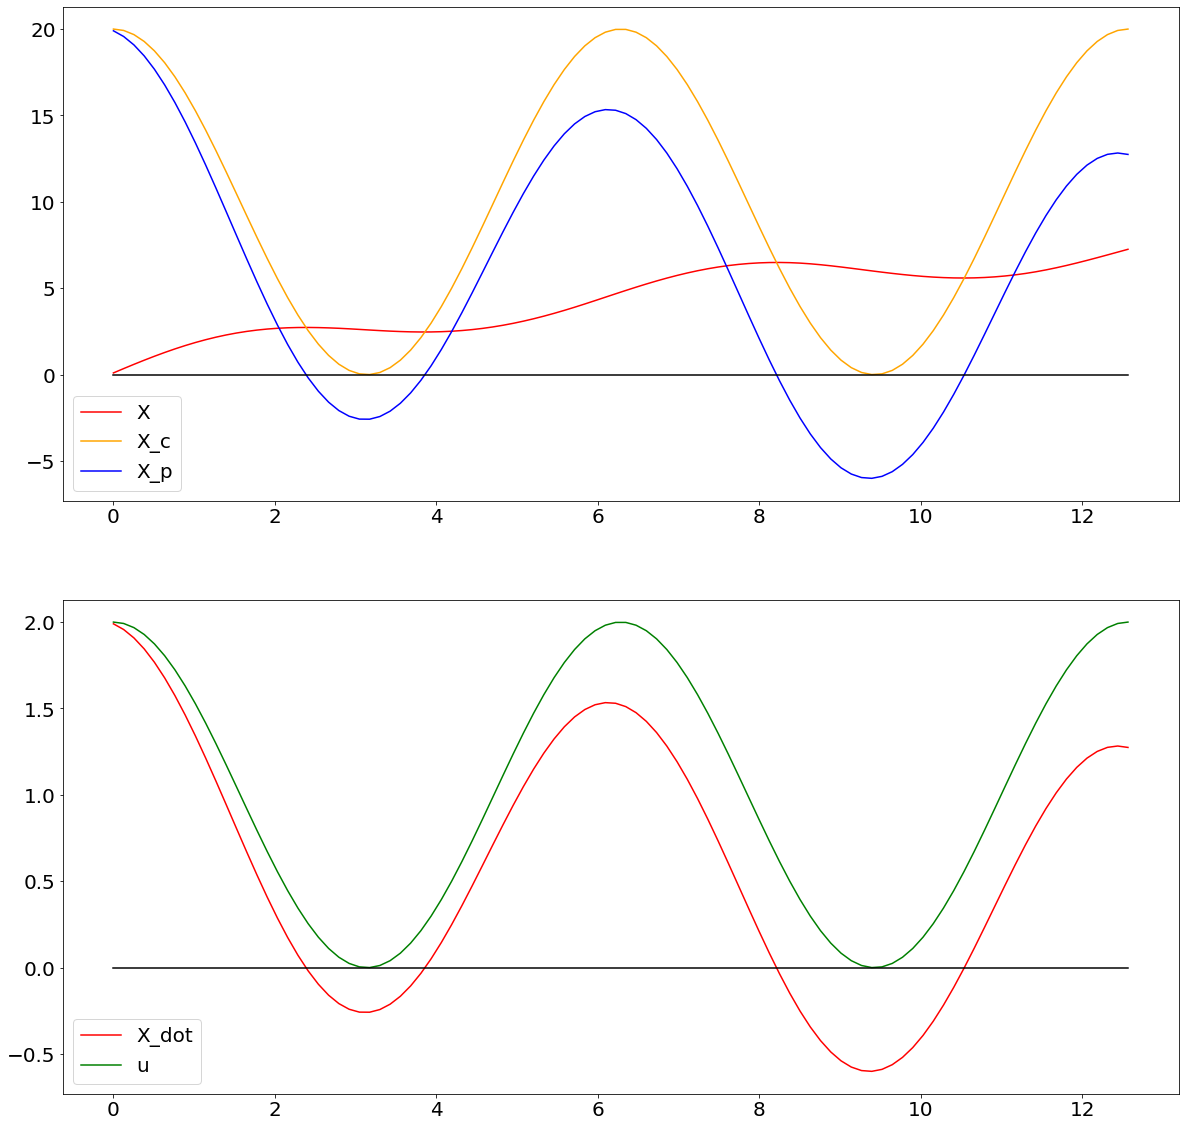

In [18]:
from scipy.integrate import solve_ivp

def u(t):
    return (np.cos(t)+1)

def M(t):
    #return (np.sin(t)+2)*0.1
    return 0.1

def X_dot(t, X): 
    return u(t) - M(t)*X

X_0=0.1
t_start=0
t_end=4*np.pi


sol = solve_ivp(X_dot, t_span=[t_start,t_end],t_eval=np.linspace(t_start,t_end,100),y0=np.array([X_0]))

times=sol.t
n=len(times)
Xs=sol.y.transpose().reshape(n,)

def inv_M(t):
    return 1/M(t)

def X_c(t):
    return inv_M(t)*u(t)
X_cs = np.array(list(map(X_c,times)))
us= np.array(list(map(u,times)))
X_ps = X_cs-Xs
X_dot_ts=np.array(list(map(lambda i:X_dot(times[i],Xs[i]),range(n))))    
Xs.shape,X_cs.shape,X_dot_ts.shape
d={
    "X": Xs, 
    "X_c": X_cs,
    "X_p": X_ps,
    "X_dot": X_dot_ts,
    "u": us 
}
names_1=['X','X_c','X_p']
names_2=['X_dot','u']
f=plt.figure(figsize=(20,20))
axs=f.subplots(2,1)
for name in names_1:
    axs[0].plot(times,d[name],color=cd[name],label=name)
axs[0].plot(times,np.zeros_like(times),color='black')
axs[0].legend()

for name in names_2:
    axs[1].plot(times,d[name],color=cd[name],label=name)
axs[1].plot(times,np.zeros_like(times),color='black')
axs[1].legend()

In [19]:
### For a 2-dimensional example look at 

### Towards attribution of uncertainty
One of the attractive promises of traceability analysis is the hierachie of attribution to successively finer degree. 
$$
\mathbf{X_c}=\mathbf{RT} u
$$
$$
\Delta X_c \approx 
\frac{\partial X_c}{\partial RT} \Delta RT +
\frac{\partial X_c}{\partial u} \Delta u
$$
$$
=u\Delta RT + RT \Delta u
$$

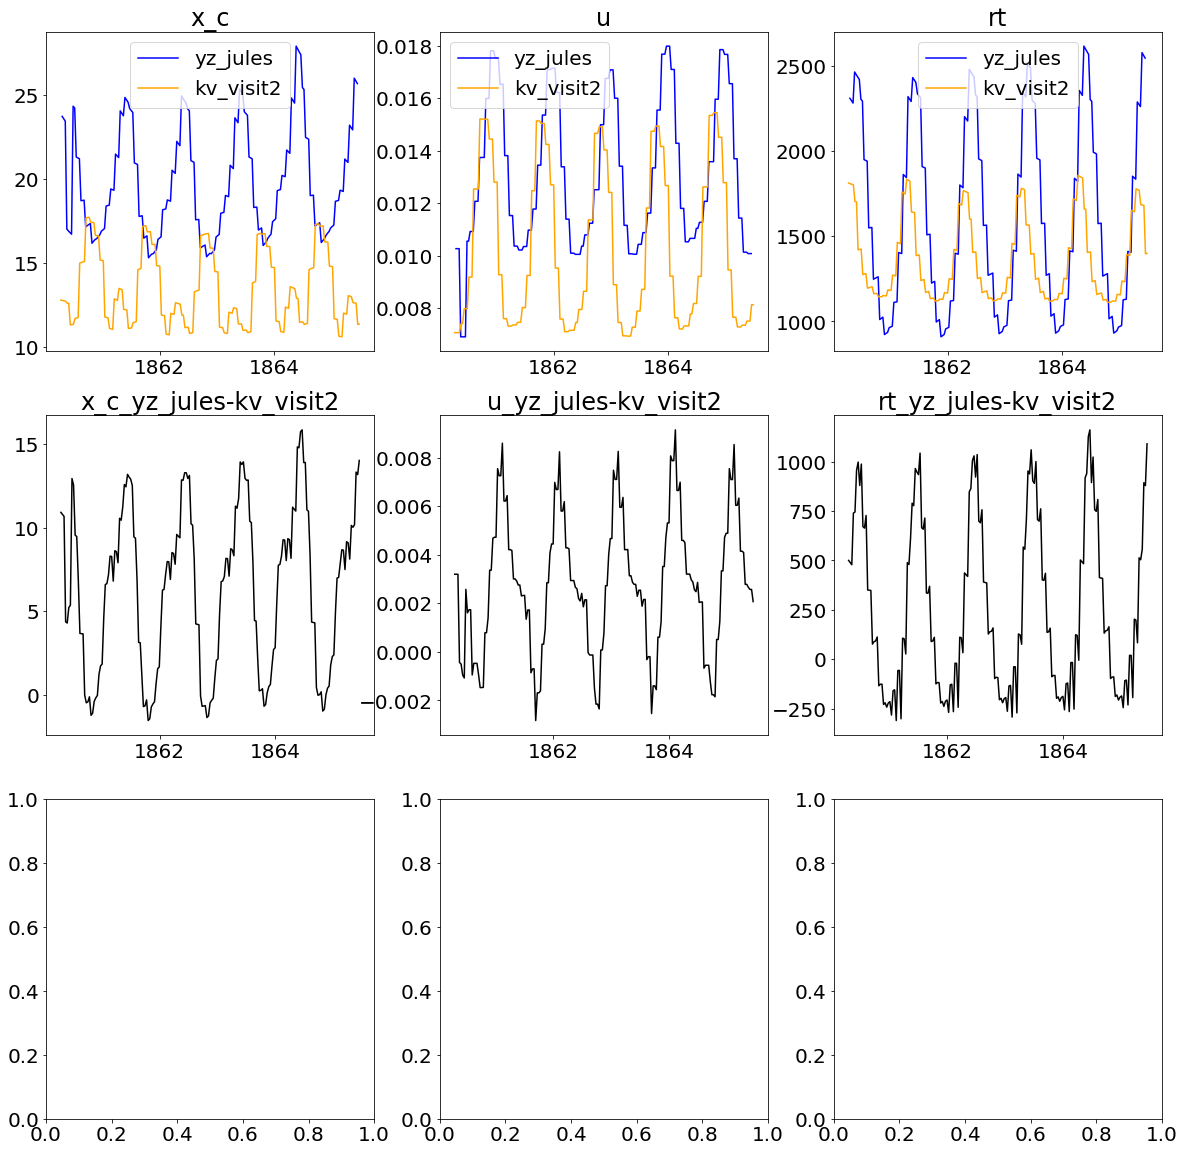

In [20]:
model_cols={
    "yz_jules": "blue",
    "kv_visit2": "orange",
}
from scipy.interpolate import interp1d, splprep

def plot_diff(mf_1, mf_2, delta_t_val, model_cols):
    
    part=30
    start_min_1,stop_max_1=min_max_index(mf_1,delta_t_val,*t_min_tmax([mf_1,mf_2],delta_t_val))
    # we do not want the whole interval but look at a smaller part to observe the dynamics
    start_1,stop_1 = start_min_1, int(start_min_1+(stop_max_1-start_min_1)/part)
    itr_1=tracebility_iterator(mf_1,delta_t_val)
    vals_1=itr_1[start_1:stop_1]
    times_1=times_in_days_aD(mf_1,delta_t_val)[start_1:stop_1]/365
    
    start_min_2,stop_max_2=min_max_index(mf_2,delta_t_val,*t_min_tmax([mf_2,mf_2],delta_t_val))
    # we do not want the whole interval but look at a smaller part to observe the dynamics
    start_2,stop_2 = start_min_2, int(start_min_2+(stop_max_2-start_min_2)/part)
    itr_2=tracebility_iterator(mf_2,delta_t_val)
    vals_2=itr_2[start_2:stop_2]
    times_2=times_in_days_aD(mf_2,delta_t_val)[start_2:stop_2]/365
    fig=plt.figure(figsize=(2*10,20))
    axs=fig.subplots(3,3)
    ###################################################
    # plot x_c, u and rt for both models 
    ###################################################
    def subp(ax,name):
        def subsubp(mf,vals,times):
            ax.plot(
                times,
                vals.__getattribute__(name),
                color=model_cols[mf],
                label=mf
            )
            
        subsubp( mf_1, vals_1,  times_1 )
        subsubp( mf_2, vals_2,  times_2 )
        ax.legend()
        ax.set_title(name)

        
    subp(axs[0,0],"x_c")
    subp(axs[0,1],"u")
    subp(axs[0,2],"rt")
    #
    ####################################################
    ## plot delta_x_c delta_u and delta_rt  
    ####################################################
    # Since the two models do not necessarily share the same point in time and not
    # even the same stepsize or number of steps we compute interpolating functions
    # to make them comparable
    def diffp(ax,name):
        f1=interp1d(times_1,vals_1.__getattribute__(name))
        f2=interp1d(times_2,vals_2.__getattribute__(name))
        # chose the interval covered by both to avoid extrapolation
        start=max(times_1.min(),times_2.min())
        stop=min(times_1.max(),times_2.max())
        nstep=min(len(times_1),len(times_2))
        times=np.linspace(start,stop,nstep)
        
        diff=f1(times)-f2(times)
        ax.plot(times,diff,color="black")
        ax.set_title("{0}_{1}-{2}".format(name,mf_1,mf_2))
        
    diffp(axs[1,0],"x_c")
    diffp(axs[1,1],"u")
    diffp(axs[1,2],"rt")
    
mf_1="yz_jules"
mf_2="kv_visit2"
plot_diff(mf_1, mf_2,delta_t_val=10,model_cols=model_cols)